## Predicting whether a student is placed or not using Deep Neural Network 

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


C:\New\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import dummy dataset

In [2]:
df = pd.read_csv(r'C:\Users\This Pc\Desktop\csv\DEEP Learning\DNN\placement (1).csv')
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [3]:
df.tail()

,cgpa,resume_score,placed
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1
99,6.09,6.61,0


In [4]:
df.shape

(100, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.columns

Index(['cgpa', 'resume_score', 'placed'], dtype='object')

### Preprocessing

In [7]:
df.isnull().sum()

cgpa            0
resume_score    0
placed          0
dtype: int64

In [8]:
df.duplicated().sum()

0

C:\New\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='cgpa', ylabel='resume_score'>

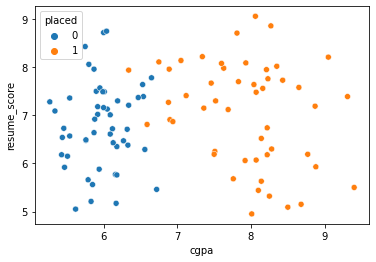

In [9]:
sns.scatterplot(df['cgpa'], df['resume_score'], hue=df['placed'])

### Split dependent and independent variable

In [10]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
x.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: placed, dtype: int64

### Mandatory step - Feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

### Train test split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=1)

# Deep Neural Network or Artifical Neural Network Model

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
dnn = Sequential()
dnn.add(Dense(units=6, activation='relu',input_dim=2))
dnn.add(Dense(units=6, activation='relu'))
dnn.add(Dense(units=1, activation= 'sigmoid'))


In [17]:
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [18]:
dnn.compile(loss='binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
history=dnn.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
3/3 [==============================] - 11s 167ms/step - loss: 0.6944 - accuracy: 0.3125 - val_loss: 0.7207 - val_accuracy: 0.1000
Epoch 2/500
3/3 [==============================] - 0s 19ms/step - loss: 0.6900 - accuracy: 0.3125 - val_loss: 0.7161 - val_accuracy: 0.1000
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6858 - accuracy: 0.3125 - val_loss: 0.7120 - val_accuracy: 0.1000
Epoch 4/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6820 - accuracy: 0.3250 - val_loss: 0.7081 - val_accuracy: 0.1000
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 0.6783 - accuracy: 0.3250 - val_loss: 0.7043 - val_accuracy: 0.1000
Epoch 6/500
3/3 [==============================] - 0s 28ms/step - loss: 0.6748 - accuracy: 0.3250 - val_loss: 0.7007 - val_accuracy: 0.1500
Epoch 7/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6711 - accuracy: 0.3250 - val_loss: 0.6972 - val_accuracy: 0.2000
Epoch 8/500
3/3 [=

### Plotting accuracy

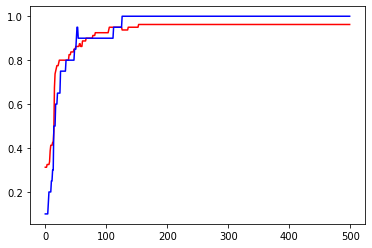

In [19]:
plt.plot(history.history['accuracy'],color="red")
plt.plot(history.history['val_accuracy'],color="blue")

### Plotting loss 

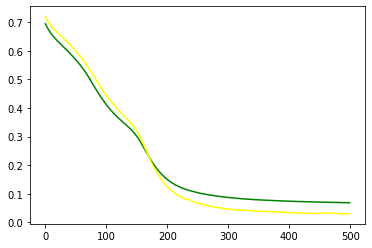

In [20]:
plt.plot(history.history['loss'],color="green")
plt.plot(history.history['val_loss'],color="yellow")